In [210]:
from ultralytics import YOLO

model = YOLO('yolov5s.pt')  


PRO TIP  Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



In [211]:

 # run the model 
#results = model("https://img.parlmany.com/large/32219.jpg")

#results = model("https://paultan.org/image/2020/01/UKM-plate-Malaysia-1-630x420.jpg") # this is high quality image 
#results = model("https://5.imimg.com/data5/SELLER/Default/2023/8/337432643/BW/SR/KG/78628874/seat-belt-detection-system-250x250.jpg")
results = model("https://source.roboflow.com/R8EEE0Tjxmf6Qxxmeqa3eqWlknt2/02xSLnHetDx47FWi3jQA/original.jpg")

print(results[0])
predictions = results[0]



Found https://source.roboflow.com/R8EEE0Tjxmf6Qxxmeqa3eqWlknt2/02xSLnHetDx47FWi3jQA/original.jpg locally at original.jpg
image 1/1 c:\Users\w\Documents\my_csv_project\ai-pros-v1-2025\W4_DL\C1_M3_Data_Management\C1M3_Assignment\original.jpg: 384x640 1 car, 115.5ms
Speed: 2.5ms preprocess, 115.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball

In [212]:
import os
from PIL import Image
# get the cars only and save it 
boxes = results[0].boxes

cars =[]

car_count = 0
for box in boxes:
    
    cls = int(box.cls[0])
    
    if cls == 2:
        car_count += 1
        
        cord = box.xyxy[0].tolist()
        #
        img = Image.fromarray(results[0].orig_img)
        cropped_car = img.crop((cord[0], cord[1], cord[2], cord[3]))
        cars.append(cropped_car)
        
        # cropped_car.save(os.path.join(output_dir, f'car_{car_count}.jpg'))

print(f"   {len(cars) }  car  saved  at  cars list  ")
print(cars)

   1  car  saved  at  cars list  
[<PIL.Image.Image image mode=RGB size=664x664 at 0x29BF6DE3BF0>]


In [213]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

model_path = r'.\best.pt'
seat_model = YOLO(model_path)


0: 640x640 (no detections), 143.1ms
Speed: 6.1ms preprocess, 143.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: '1', 1: '2', 2: 'No-helmet', 3: 'Np', 4: 'bike', 5: 'car', 6: 'helmet', 7: 'mobile', 8: 'no-helmet', 9: 'person-noseatbelt', 10: 'person-seatbelt', 11: 'seatbelt'}
obb: None
orig_img: array([[[123, 139, 152],
        [127, 143, 156],
        [133, 149, 162],
        ...,
        [150, 168, 180],
        [147, 165, 177],
        [153, 171, 183]],

       [[110, 126, 139],
        [121, 137, 150],
        [120, 136, 149],
        ...,
        [152, 170, 182],
        [149, 167, 179],
        [149, 167, 179]],

       [[121, 137, 150],
        [127, 143, 156],
        [116, 132, 145],
        ...,
        [153, 171, 183],
        [153, 171, 183],
        [147, 165, 177]],

       ...,

       [[  7,   7,   7],
 

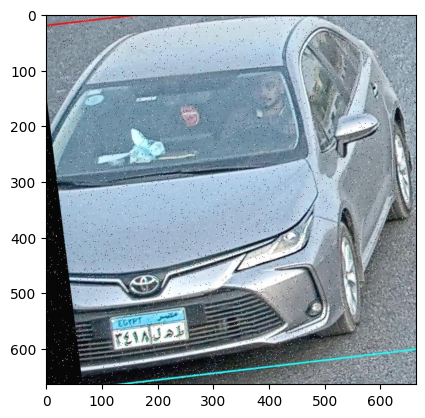

In [214]:
pred = seat_model.predict(source= cars , conf=0.10 , imgsz=640)
for r in pred:
    print(pred)
    array= r.plot()
    plt.imshow(array)
    plt.show()
    
    
   

No belt or violation was detected in this image.


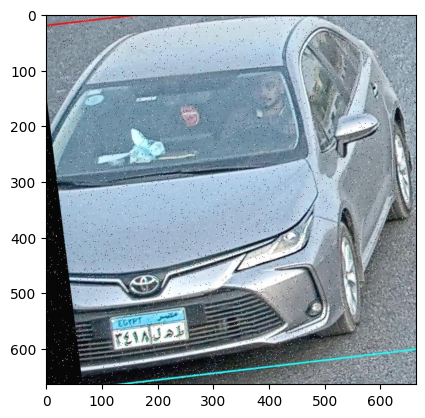

In [215]:
for r in pred:
  
    boxes = r.boxes
    
    if len(boxes) == 0:
      print("No belt or violation was detected in this image.")
    
    for box in boxes:
        # get class id 
        cls_id = int(box.cls[0])
        #  get class name 
        cls_name = r.names[cls_id]
        # (Confidence)
        conf = float(box.conf[0])
        
        print(f": {cls_name} | class id  : {cls_id} | confidence: {conf:.2f}")

    
    plt.imshow(r.plot())
    plt.show()
    


0: 640x640 1 License_Plate, 962.5ms
Speed: 4.5ms preprocess, 962.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


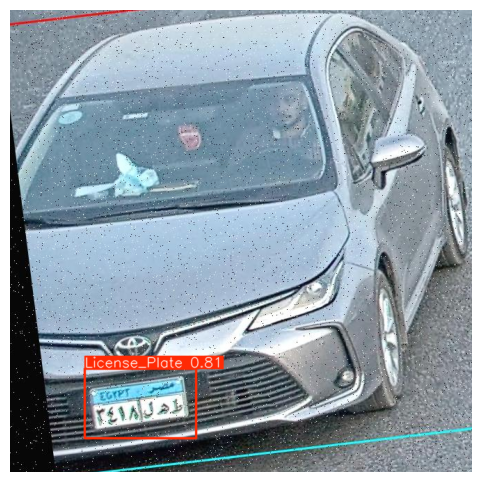

  1 plates croped  .


In [216]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2


model = YOLO(r" .\license-plate-finetune-v1m.pt")

license_plates_crops = []

for x in cars:
    results = model.predict(source=x)
    
 
    res_plotted = results[0].plot()
    
    plt.figure(figsize=(10, 6))
    plt.imshow(res_plotted)
    plt.axis('off') 
    plt.show() 
    
    
    for r in results:
        for box in r.boxes:
            cord = box.xyxy[0].tolist()
            plate_crop = x.crop((cord[0], cord[1], cord[2], cord[3]))
            license_plates_crops.append(plate_crop)

print(f"  {len(license_plates_crops)} plates croped  .")

In [217]:
import cv2
import numpy as np
import pytesseract
from PIL import Image

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

for plate in license_plates_crops:
    
    img = np.array(plate)
    
    
    img = cv2.resize(img, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)
    
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
   
    text = pytesseract.image_to_string(gray, lang='ara', config='--psm 7')
    
    print(f" {text.strip()}") # result from plate detection ---> OCR --> text 
    print(pred) # it take cars list
   
    
    
   

 72
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: '1', 1: '2', 2: 'No-helmet', 3: 'Np', 4: 'bike', 5: 'car', 6: 'helmet', 7: 'mobile', 8: 'no-helmet', 9: 'person-noseatbelt', 10: 'person-seatbelt', 11: 'seatbelt'}
obb: None
orig_img: array([[[123, 139, 152],
        [127, 143, 156],
        [133, 149, 162],
        ...,
        [150, 168, 180],
        [147, 165, 177],
        [153, 171, 183]],

       [[110, 126, 139],
        [121, 137, 150],
        [120, 136, 149],
        ...,
        [152, 170, 182],
        [149, 167, 179],
        [149, 167, 179]],

       [[121, 137, 150],
        [127, 143, 156],
        [116, 132, 145],
        ...,
        [153, 171, 183],
        [153, 171, 183],
        [147, 165, 177]],

       ...,

       [[  7,   7,   7],
        [  7,   7,   7],
        [  7,   7,   7],
        ...,
        [166, 179, 187],
        [153, 166, 175],
        [156, 169, 

In [218]:
from PIL import Image
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
print(f"  {len(license_plates_crops)} plates croped  .")
for plate in license_plates_crops :
 # Use pytesseract's image_to_string function to extract text
        extracted_text = pytesseract.image_to_string(plate , lang='ara', config='--psm 7' )
        print(extracted_text)



  1 plates croped  .



In [219]:
license_plates_crops

[<PIL.Image.Image image mode=RGB size=160x99>]